In [24]:
import tensorflow as tf
import os
import shutil

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
    
train_generator = train_datagen.flow_from_directory(
    'Documents/coincent_proj/train',
    target_size=(64,64),
    batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'Documents/coincent_proj/test/',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [28]:
#build CNN model
#initialize
cnn= tf.keras.models.Sequential()

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [30]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [31]:
#providing one more layer 

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [32]:
#Flattten

cnn.add(tf.keras.layers.Flatten())

In [33]:
#full connection

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [34]:
#output layer
 
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [35]:
#compile the model

cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
#train the model

history= cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
625/625 [==============================] - 320s 508ms/step - loss: 0.5972 - accuracy: 0.6695 - val_loss: 0.5202 - val_accuracy: 0.7420
Epoch 2/10
625/625 [==============================] - 212s 339ms/step - loss: 0.4896 - accuracy: 0.7634 - val_loss: 0.4580 - val_accuracy: 0.7834
Epoch 3/10
625/625 [==============================] - 120s 191ms/step - loss: 0.4321 - accuracy: 0.7980 - val_loss: 0.4463 - val_accuracy: 0.7888
Epoch 4/10
625/625 [==============================] - 123s 198ms/step - loss: 0.3823 - accuracy: 0.8268 - val_loss: 0.4372 - val_accuracy: 0.7932
Epoch 5/10
625/625 [==============================] - 212s 339ms/step - loss: 0.3318 - accuracy: 0.8508 - val_loss: 0.4491 - val_accuracy: 0.8014
Epoch 6/10
625/625 [==============================] - 110s 176ms/step - loss: 0.2656 - accuracy: 0.8885 - val_loss: 0.4699 - val_accuracy: 0.8110
Epoch 7/10
625/625 [==============================] - 210s 336ms/step - loss: 0.1983 - accuracy: 0.9201 - val_loss: 0.4855 -

In [42]:
import numpy as np
from keras.utils import load_img, img_to_array
test_image= load_img("Documents/coincent_proj/validate/predict2.jpg.jpg", target_size= (64,64))
test_image= img_to_array(test_image)
test_image= np.expand_dims(test_image,axis=0)
result= cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction= 'dog'
else:
    prediction= 'cat'

1/1 [==============================] - 0s 54ms/step


In [43]:
prediction

'dog'

In [39]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


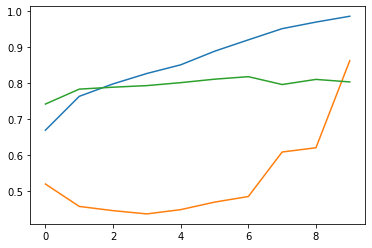

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])